In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
load_data = pd.read_csv('21_05_to_22_05_loads_v1.csv')


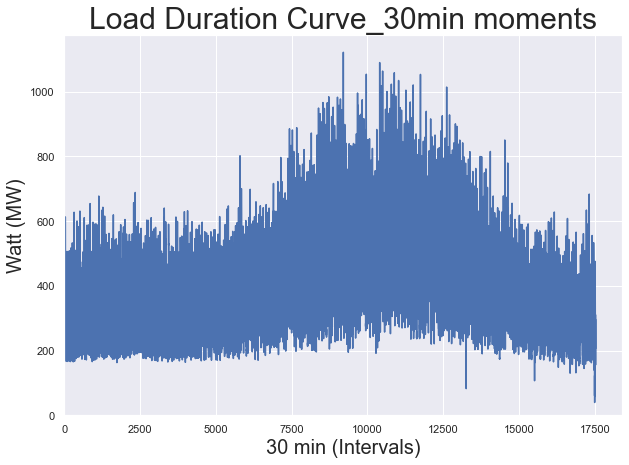

In [3]:
# Plotting the load profile

sb.set(rc={"figure.figsize":(10,7)}) #figure size, width=xx, height=xx
p = sb.lineplot(x = "halfhour", y = "watt", data = load_data)

plt.ylim(0, None)
plt.xlim(0, None)

p.set_title("Load Duration Curve_30min moments", fontsize = 30)
p.set_xlabel("30 min (Intervals)", fontsize = 20)
p.set_ylabel("Watt (MW)", fontsize = 20)
plt.show()

In [4]:
# Add a column for the time interval for which the loads were recorded

load_data['interval'] = 0.5


In [5]:
# Sort the DataFrame by the loads, in descending order of magnitude

load_data_sorted = load_data.sort_values(by=['watt'], ascending = False)


In [6]:
# Use the cumsum() function to to add a column with the duration 
# for which the system load is greater than or equal to each load

load_data_sorted['duration'] = load_data_sorted['interval'].cumsum()


In [7]:
# Calculate the percentage of time for which the system load is greater than or equal to each load

load_data_sorted['percentage'] = load_data_sorted['duration']*100/8764


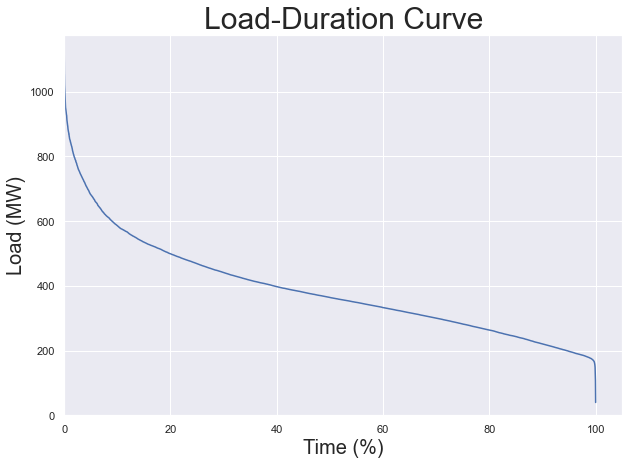

In [8]:
# Plot the load_duration curve (Load vs Percentage of time)
p = sb.lineplot(x = "percentage", y = "watt", data = load_data_sorted)

plt.ylim(0, None)
plt.xlim(0, None)

p.set_title("Load-Duration Curve", fontsize = 30)
p.set_xlabel("Time (%)", fontsize = 20)
p.set_ylabel("Load (MW)", fontsize = 20)

plt.show()
